Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,979 (359.29 KB)

 Trainable params: 91,979 (359.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
544/544 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2012 - loss: 3.0130 - val_accuracy: 0.6075 - val_loss: 1.2990
Epoch 2/30
544/544 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6550 - loss: 1.0717 - val_accuracy: 0.7855 - val_loss: 0.7527
Epoch 3/30
544/544 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8124 - loss: 0.5742 - val_accuracy: 0.8370 - val_loss: 0.5656
Epoch 4/30
544/544 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8801 - loss: 0.3788 - val_accuracy: 0.8692 - val_loss: 0.5225
Epoch 5/30
544/544 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9126 - loss: 0.2719 - val_accuracy: 0.8941 - val_loss: 0.4493
Epoch 6/30
544/544 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9307 - loss: 0.2113 - val_accuracy: 0.9043 - val_loss: 0.4520
Epoch 7/30
544/544 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9420 - loss: 0.1865 - val_accuracy: 0.9084 - val_loss: 0.4041
Epoch 8/30
544/544 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9487 - loss: 0.1560 - val_accu

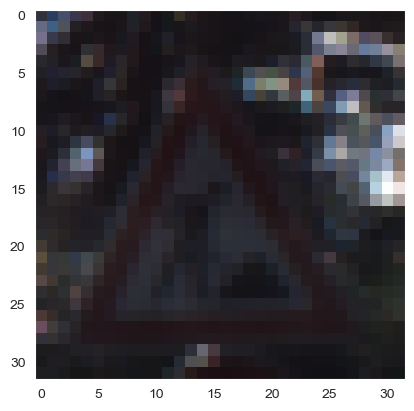

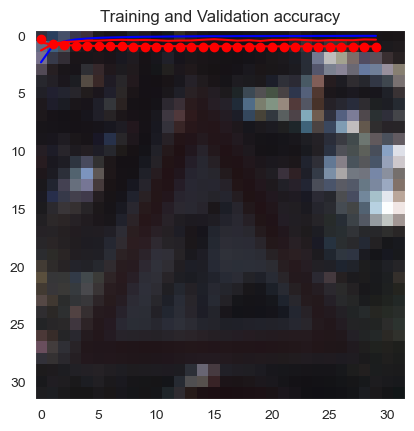

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
import os

with open(os.path.join("dataset", "train.p"), mode='rb') as training_data:
    train = pickle.load(training_data)
with open(os.path.join("dataset", "valid.p"), mode='rb') as validation_data:
    valid = pickle.load(validation_data)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)

X_train_norm = X_train / 255
X_valid_norm = X_valid / 255

i = random.randint(1, len(X_train_norm))
plt.grid(False)
plt.imshow(X_train[i])
plt.figure()
plt.grid(False)
plt.imshow(X_train_norm[i].squeeze(), cmap = 'gray') # cmap


# Andere Architektur
from tensorflow.keras import datasets, layers, models

model = models.Sequential()

# 1. Convolution + MaxPooling
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 2. Convolution + MaxPooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 3. Convolution + MaxPooling
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten & Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))  # Weniger Neuronen
model.add(layers.Dropout(0.3))
model.add(layers.Dense(43, activation='softmax'))  # 43 Klassen

# Kompilieren
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Übersicht
model.summary()

model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x = X_train_norm,
                    y = y_train,
                    batch_size = 64,
                    epochs = 30,
                    verbose = 1,
                    validation_data = (X_valid_norm, y_valid))

history.history.keys()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')

plt.plot(epochs, accuracy, 'ro', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')

model.save('saved_model/Test2.h5')



138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


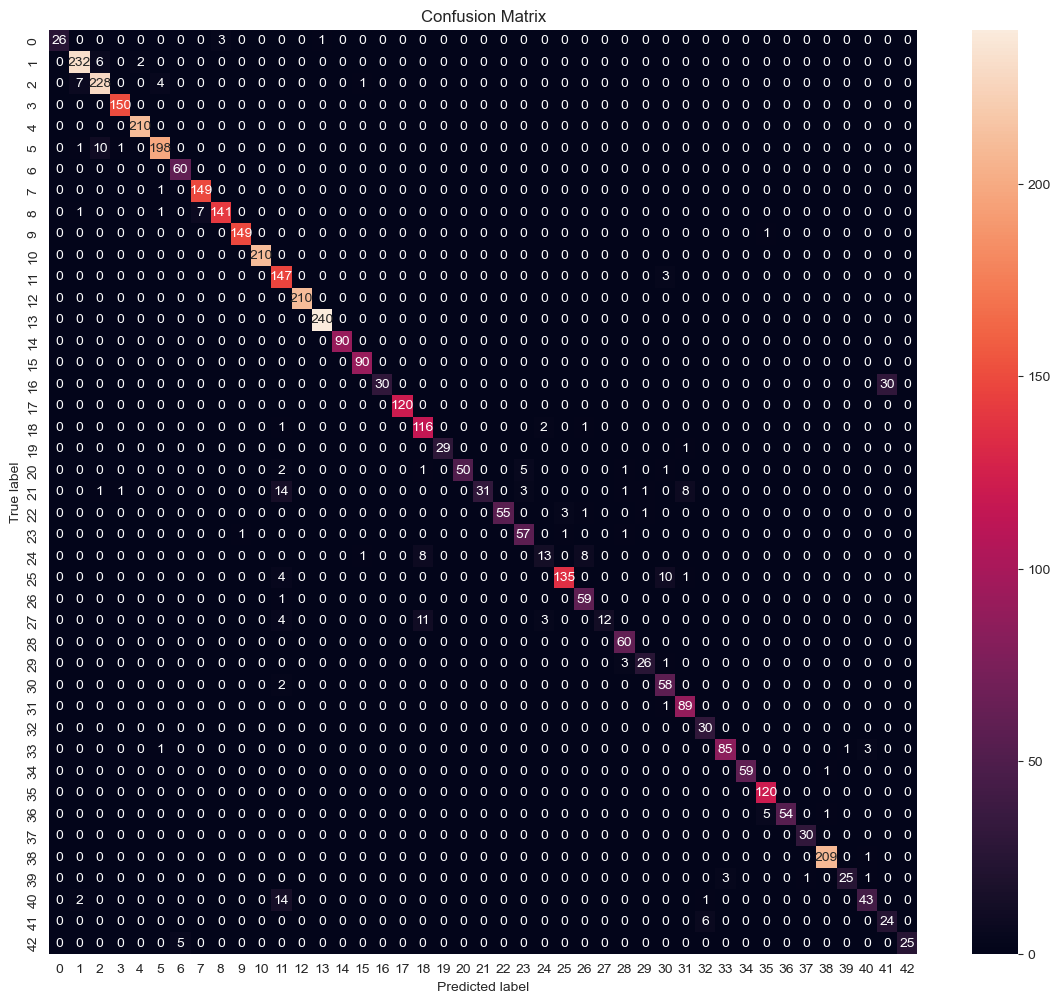

138/138 - 1s - 5ms/step - accuracy: 0.9247 - loss: 72.4564
Validation Accuracy: 92.47%


In [8]:
#Matrix
from sklearn.metrics import confusion_matrix


X_valid_norm = X_valid / 255



y_pred_probs = model.predict(X_valid_norm)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


test_loss, test_accuracy = model.evaluate(X_valid, y_valid, verbose=2)
print(f"Validation Accuracy: {test_accuracy:.2%}")
